Import libraries.

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.spatial.distance import cdist
from wordcloud import WordCloud

Read in the lyrics file.

In [2]:
with open("lyrics.txt", "r") as file:
    lyrics = file.read()

In [3]:
lyrics[:3000]

'\n    [ ]\nI was born inside a small town, I lost that state of mind\nLearned to sing inside the Lord\'s house, but stopped at the age of nine\nI forget when I get awards now the wave I had to ride\nThe paving stones I played upon, they kept me on the grind\nSo blame it on the pain that blessed me with the life\nFriends and family filled with envy when they should be filled with pride\nAnd when the world\'s against me is when I really come alive\nAnd everyday that Satan tempts me, I try to take it in my stride\nYou know that I\'ve got whisky with white lines and smoke in my lungs\nI think life has got to the point I know without it\'s no fun\nI need to get in the right mind and clear myself up\nInstead, I look in the mirror questioning what I\'ve become\nI guess it\'s a stereotypical day for someone like me\nWithout a nine-to-five job or an uni degree\nTo be caught up in the trappings of the industry\nShow me the locked doors, I find another use for the key\nAnd you\'ll see\n\n[  1]\n

Split songs apart.

In [4]:
lyrics = lyrics.split("\n\n\n")

In [5]:
lyrics[0]

"\n    [ ]\nI was born inside a small town, I lost that state of mind\nLearned to sing inside the Lord's house, but stopped at the age of nine\nI forget when I get awards now the wave I had to ride\nThe paving stones I played upon, they kept me on the grind\nSo blame it on the pain that blessed me with the life\nFriends and family filled with envy when they should be filled with pride\nAnd when the world's against me is when I really come alive\nAnd everyday that Satan tempts me, I try to take it in my stride\nYou know that I've got whisky with white lines and smoke in my lungs\nI think life has got to the point I know without it's no fun\nI need to get in the right mind and clear myself up\nInstead, I look in the mirror questioning what I've become\nI guess it's a stereotypical day for someone like me\nWithout a nine-to-five job or an uni degree\nTo be caught up in the trappings of the industry\nShow me the locked doors, I find another use for the key\nAnd you'll see\n\n[  1]\nI'm wel

Get rid of special characters.

In [6]:
lyrics = [re.sub("[\(\[].*?[\)\]]", "", lyric) for lyric in lyrics]

In [7]:
lyrics = [lyric.replace("\n", " ") for lyric in lyrics]

In [8]:
lyrics[0]

"      I was born inside a small town, I lost that state of mind Learned to sing inside the Lord's house, but stopped at the age of nine I forget when I get awards now the wave I had to ride The paving stones I played upon, they kept me on the grind So blame it on the pain that blessed me with the life Friends and family filled with envy when they should be filled with pride And when the world's against me is when I really come alive And everyday that Satan tempts me, I try to take it in my stride You know that I've got whisky with white lines and smoke in my lungs I think life has got to the point I know without it's no fun I need to get in the right mind and clear myself up Instead, I look in the mirror questioning what I've become I guess it's a stereotypical day for someone like me Without a nine-to-five job or an uni degree To be caught up in the trappings of the industry Show me the locked doors, I find another use for the key And you'll see   I'm well aware of certain things tha

Get rid of empty strings and strings with spaces.

In [9]:
lyrics = [lyric for lyric in lyrics if lyric != '' and lyric != '    ']

In [10]:
lyrics[0]

"      I was born inside a small town, I lost that state of mind Learned to sing inside the Lord's house, but stopped at the age of nine I forget when I get awards now the wave I had to ride The paving stones I played upon, they kept me on the grind So blame it on the pain that blessed me with the life Friends and family filled with envy when they should be filled with pride And when the world's against me is when I really come alive And everyday that Satan tempts me, I try to take it in my stride You know that I've got whisky with white lines and smoke in my lungs I think life has got to the point I know without it's no fun I need to get in the right mind and clear myself up Instead, I look in the mirror questioning what I've become I guess it's a stereotypical day for someone like me Without a nine-to-five job or an uni degree To be caught up in the trappings of the industry Show me the locked doors, I find another use for the key And you'll see   I'm well aware of certain things tha

Define a vectorizer.

In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words = "english", min_df = 0.01, max_df = 0.5, token_pattern='\\b[a-z][a-z]+\\b')

Apply the vectorizer to the file.

In [12]:
tfidf_matrix = tfidf_vectorizer.fit_transform(lyrics)

In [13]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vectorizer.get_feature_names())

In [14]:
tfidf_df.head(10)

,act,admit,afraid,age,ago,ah,ahead,ai,ain,aint,...,ya,yea,yeah,year,years,yellow,yes,yesterday,yo,young
0,0.000000,0.0,0.0,0.173977,0.0,0.0,0.0,0.0,0.045960,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.185852,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
6,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.253004,0.0,...,0.000000,0.0,0.057503,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
7,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.566046,0.046978,0.000000,0.0,0.0,0.0,0.0,0.000000
8,0.048896,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.028540,0.0,...,0.073444,0.0,0.000000,0.047374,0.000000,0.0,0.0,0.0,0.0,0.080456
9,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.028712,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


Determine optimal clusters using elbow method.

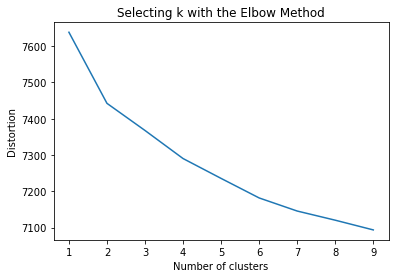

In [42]:
distortions = []
clusters = range(1,10)
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(tfidf_df)
    distortions.append(model.inertia_)
plt.plot(K, distortions)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

Reduce dimensionality. An NMF decomposition of the term-document matrix would yield components that could be considered “topics”, and decompose each document into a weighted sum of topics.

In [44]:
nmf = NMF(n_components = 6)

In [45]:
fit = nmf.fit_transform(tfidf_df)

In [46]:
fit_df = pd.DataFrame(fit)

In [47]:
fit_df.head(10)

,0,1,2,3,4,5
0,0.084007,0.000424,0.000000,0.000000,0.009202,0.028463
1,0.047225,0.000000,0.000000,0.000000,0.010895,0.011939
2,0.059143,0.000000,0.012140,0.000000,0.029665,0.047821
3,0.021835,0.000000,0.102595,0.000449,0.119388,0.014582
4,0.046661,0.000151,0.062145,0.000000,0.016959,0.009698
5,0.014317,0.001410,0.033629,0.000000,0.010793,0.056866
6,0.050568,0.000000,0.036484,0.000000,0.002966,0.051751
7,0.028126,0.000000,0.059493,0.000000,0.112766,0.040660
8,0.039172,0.000860,0.023150,0.000000,0.000000,0.095201
9,0.053672,0.000122,0.078774,0.000331,0.000000,0.004985


Max indicates which topic one song most likely belongs to.

In [48]:
fit_df["max"] = fit_df.idxmax(axis = 1)

In [49]:
fit_df.head(10)

,0,1,2,3,4,5,max
0,0.084007,0.000424,0.000000,0.000000,0.009202,0.028463,0
1,0.047225,0.000000,0.000000,0.000000,0.010895,0.011939,0
2,0.059143,0.000000,0.012140,0.000000,0.029665,0.047821,0
3,0.021835,0.000000,0.102595,0.000449,0.119388,0.014582,4
4,0.046661,0.000151,0.062145,0.000000,0.016959,0.009698,2
5,0.014317,0.001410,0.033629,0.000000,0.010793,0.056866,5
6,0.050568,0.000000,0.036484,0.000000,0.002966,0.051751,5
7,0.028126,0.000000,0.059493,0.000000,0.112766,0.040660,4
8,0.039172,0.000860,0.023150,0.000000,0.000000,0.095201,5
9,0.053672,0.000122,0.078774,0.000331,0.000000,0.004985,2


How many songs each topic has.

In [50]:
fit_df.groupby("max")["max"].count()

max
0    3582
1     453
2     882
3     420
4     775
5    2087
Name: max, dtype: int64

Check each topic's components.

In [51]:
topics = pd.DataFrame(nmf.components_, columns = tfidf_df.columns)

In [52]:
topics

,act,admit,afraid,age,ago,ah,ahead,ai,ain,aint,...,ya,yea,yeah,year,years,yellow,yes,yesterday,yo,young
0,0.009927,0.021743,0.114582,0.035388,0.069511,0.027735,0.037311,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.066455,0.135803,0.031308,0.126382,0.090448,0.000000,0.104470
1,0.000000,0.000000,0.000000,0.000000,0.000140,0.004634,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.007810,0.000000,0.000000,0.000026,0.000869,0.000000,0.000399,0.003536
2,0.000000,0.000000,0.005713,0.000000,0.000000,0.008128,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000192,0.000000,0.000000,0.025416,0.000000,0.039264,0.014850,0.000000,0.014799
3,0.000429,0.000000,0.000000,0.006379,0.001570,0.035515,0.003205,0.347359,0.000000,0.004126,...,0.074664,0.001536,0.000000,0.002724,0.000000,0.000049,0.004963,0.000000,0.127274,0.002704
4,0.000000,0.000000,0.001543,0.003221,0.000000,0.148957,0.000000,0.000000,0.000000,0.000000,...,0.009028,0.001751,0.494175,0.000000,0.000000,0.000000,0.045940,0.008878,0.000000,0.000000
5,0.064500,0.026593,0.001022,0.012887,0.000000,0.063222,0.023981,0.000000,0.778176,0.086463,...,0.372154,0.057386,0.750332,0.042600,0.018488,0.011123,0.050695,0.000000,0.214722,0.084721


Sneak a peek at each topic's top 100 words.

In [53]:
topic_dict = {}
for n in range(6):
    topic_dict[n] = topics.iloc[n,:].sort_values(ascending = False)[:100]

In [54]:
topic_dict[0]

ll          1.305610
know        0.928191
ve          0.910141
time        0.829987
don         0.809903
just        0.717488
away        0.673819
come        0.647110
way         0.646513
let         0.632753
day         0.594930
life        0.563649
say         0.541866
night       0.511032
feel        0.497878
won         0.456148
world       0.453474
heart       0.431177
eyes        0.427744
make        0.421742
home        0.401952
cause       0.385886
long        0.385378
mind        0.366270
like        0.359153
think       0.353670
gonna       0.348410
tell        0.346699
gone        0.341094
right       0.338128
              ...   
soul        0.206921
days        0.206082
wait        0.205982
waiting     0.205412
old         0.204666
god         0.204476
sing        0.204301
thing       0.204199
wrong       0.202784
remember    0.202471
cold        0.201673
close       0.201227
free        0.195906
feeling     0.194134
new         0.193675
thought     0.191020
pain        0

Extract words and weights.

In [55]:
key_list = []
for n in range(6):
    key_list.append(topics.iloc[n,:].sort_values(ascending = False)[:100].keys())

In [64]:
key_list[4]

Index(['oh', 'yeah', 'baby', 'ooh', 'ah', 'whoa', 'woah', 'hey', 'wanna', 'na',
       'let', 'lord', 'come', 'want', 'boy', 'dance', 'gonna', 'feeling',
       'know', 'heart', 'cause', 'tell', 'feel', 'waiting', 'woman', 'tonight',
       'calling', 'yes', 'won', 'believe', 'lost', 'looking', 'miss', 'girls',
       'happy', 'long', 'hold', 'best', 'dream', 'ohh', 'read', 'alright',
       'start', 'gotta', 'night', 'don', 'lonely', 'sing', 'said', 'll',
       'honey', 'good', 'crazy', 'da', 'eyes', 'sweet', 'make', 'angel',
       'ready', 'lights', 'say', 'kiss', 'hand', 'think', 'right', 'little',
       'uh', 've', 'got', 'beautiful', 'bring', 'child', 'anymore', 'coming',
       'like', 'just', 'babe', 'pretty', 'lovin', 'ring', 'knees', 'broken',
       'soul', 'oooh', 'true', 'mean', 'dancing', 'beauty', 'save', 'did',
       'break', 'sorry', 'wear', 'wonder', 'body', 'feels', 'light', 'trouble',
       'smile', 'daddy'],
      dtype='object')

In [58]:
number_list = []
for n in range(6):
    numbers = []
    for key in key_list[n]:
        numbers.append(int(topic_dict[n][key] * 100))
    number_list.append(numbers)

In [59]:
number_list[0]

[130,
 92,
 91,
 82,
 80,
 71,
 67,
 64,
 64,
 63,
 59,
 56,
 54,
 51,
 49,
 45,
 45,
 43,
 42,
 42,
 40,
 38,
 38,
 36,
 35,
 35,
 34,
 34,
 34,
 33,
 33,
 32,
 32,
 31,
 31,
 30,
 29,
 28,
 28,
 27,
 27,
 27,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 16]

Create corpora for visualization.

In [61]:
wordcloud_list = []
for n in range(6):
    wordcloud = []
    for i in range(100):
        wordcloud.append(" ".join([key_list[n][i]] * number_list[n][i]))
    wordcloud_list.append(" ".join(wordcloud))

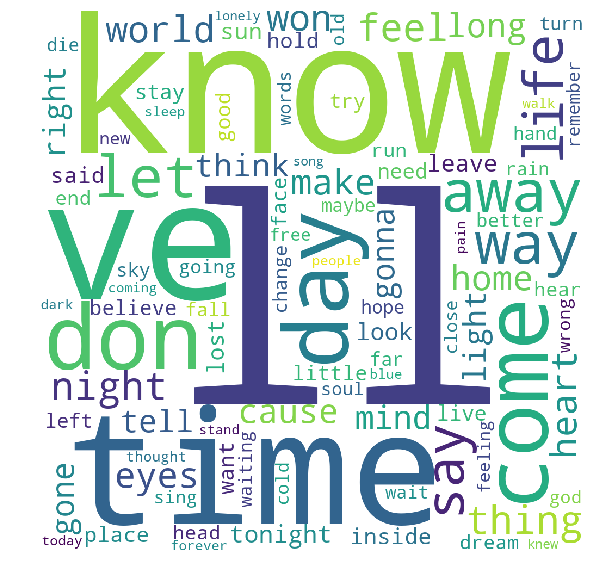

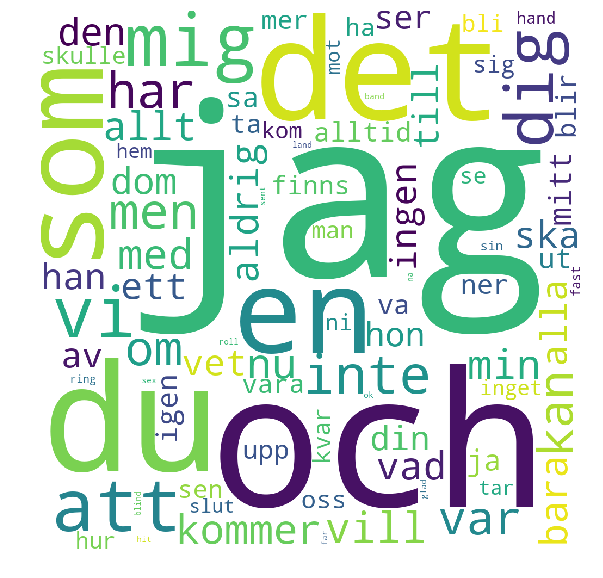

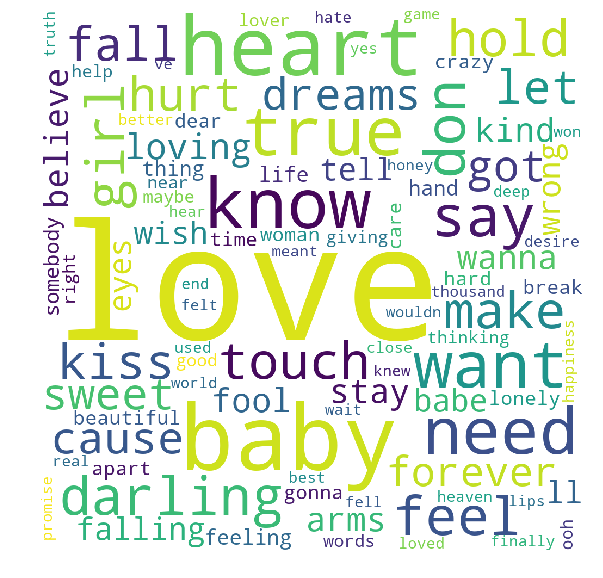

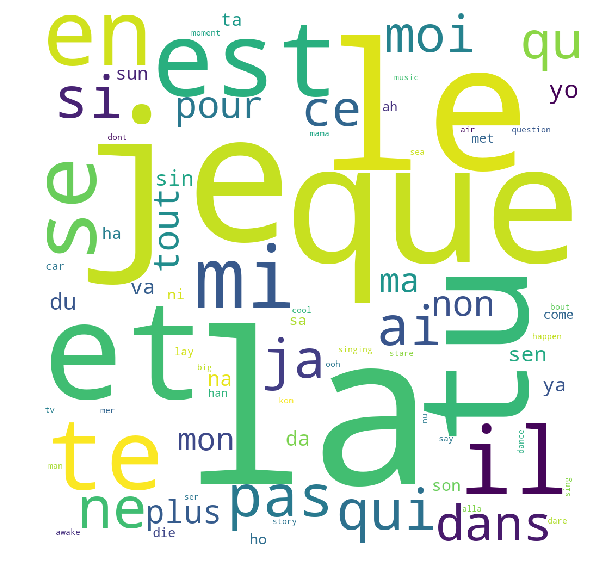

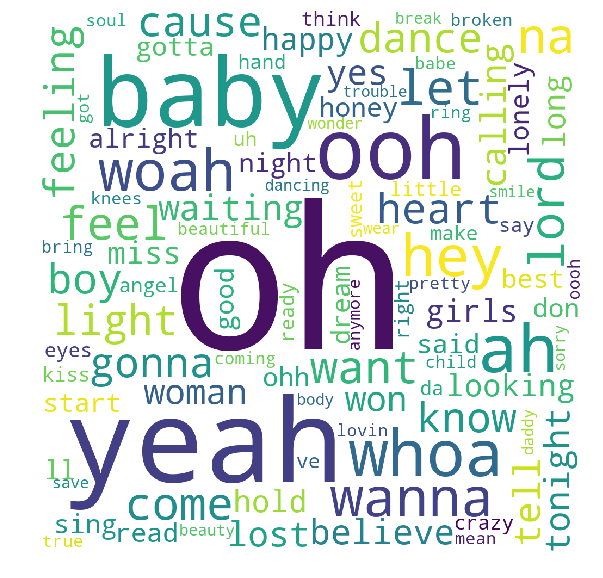

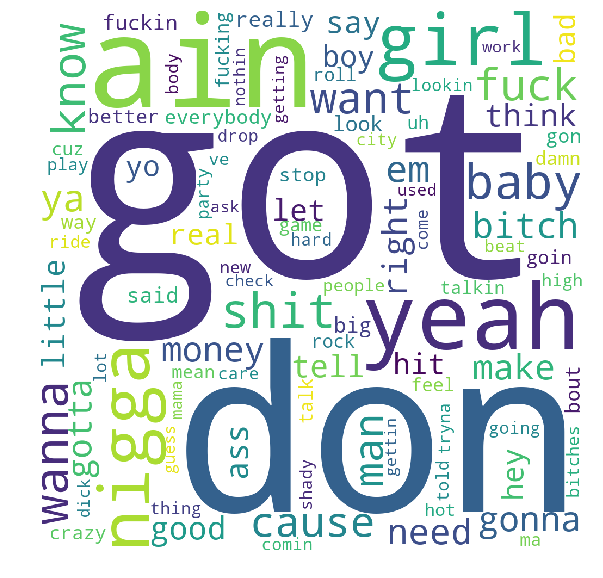

In [62]:
for i in range(6):
    wordcloud = WordCloud(background_color='white', collocations = False, width=1000, height=1000).generate(wordcloud_list[i])
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()